In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls

%matplotlib inline

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving Food_Production.csv to Food_Production.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Food_Production.csv']))

In [5]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [6]:
from collections import Counter

rows = df.shape[0]
columns = df.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

Counter(df.dtypes.values)

The train dataset contains 43 rows and 23 columns


Counter({dtype('float64'): 22, dtype('O'): 1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [8]:
df_info= pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})
df_info


,Dtype,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,34,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


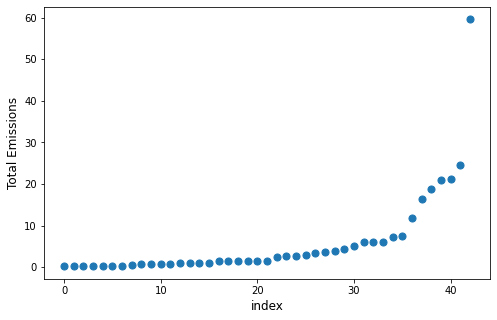

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(df.shape[0]), np.sort(df.Total_emissions.values), s= 50)
plt.xlabel('index', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.show()

Few foods seem to contribute most of the carbon footprints 


In [10]:

df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

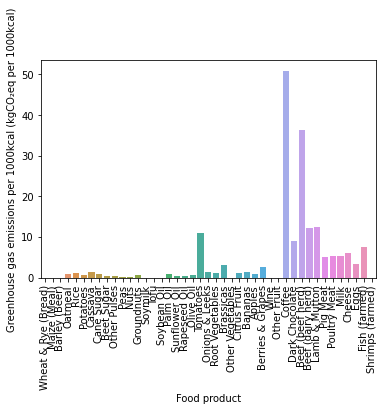

In [11]:
plt.xticks(rotation = 90)
sns.barplot(x="Food product", y="Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", data=df)

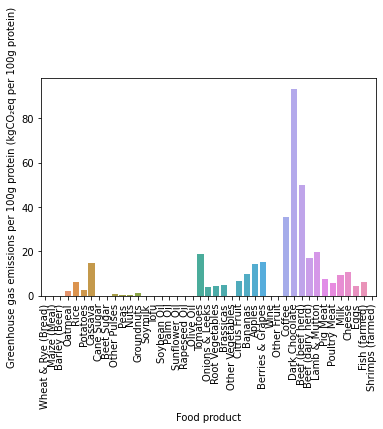

In [12]:
plt.xticks(rotation = 90)
sns.barplot(x="Food product", y="Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)", data=df)

Coffee, chocolate and beaf is responsible for most of the green house gas emissions

Plant based foods seem to be healthier and contribute very less to carbon footprints 

In [13]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]

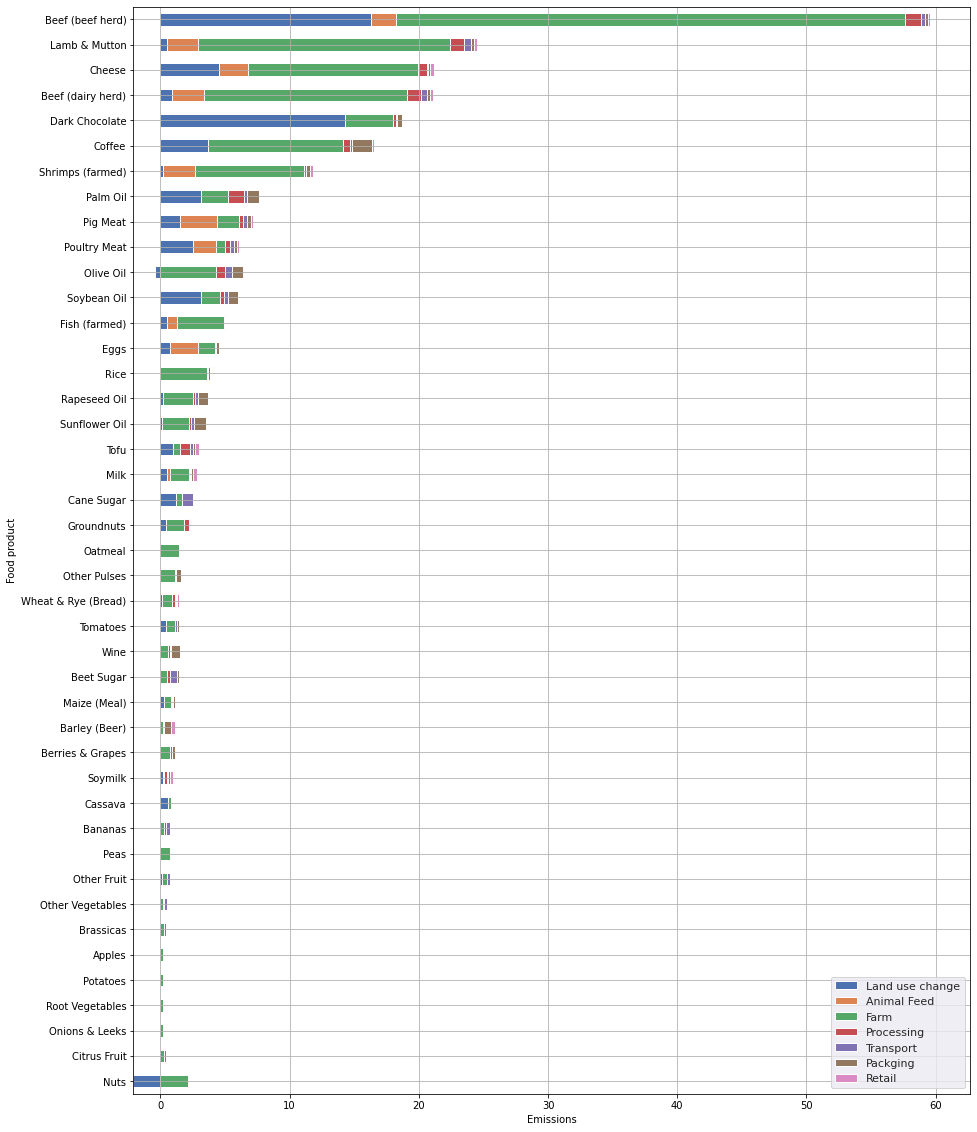

In [14]:
fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Emissions")
plt.show()

Plant based foods have lower gas emissions from the production, processing and transportation as compared to animal based foods.

In [15]:
land_df= df.dropna().sort_values(by= 'Land use per 1000kcal (m² per 1000kcal)', ascending= True)[['Food product','Land use per 1000kcal (m² per 1000kcal)']]


The amount of land required to produce food has wide variation depending upon the type of food. Let's compare the land use by foods in terms of amount of food produced per kg and nutrituional values like per 100gm/1000kcal protein.

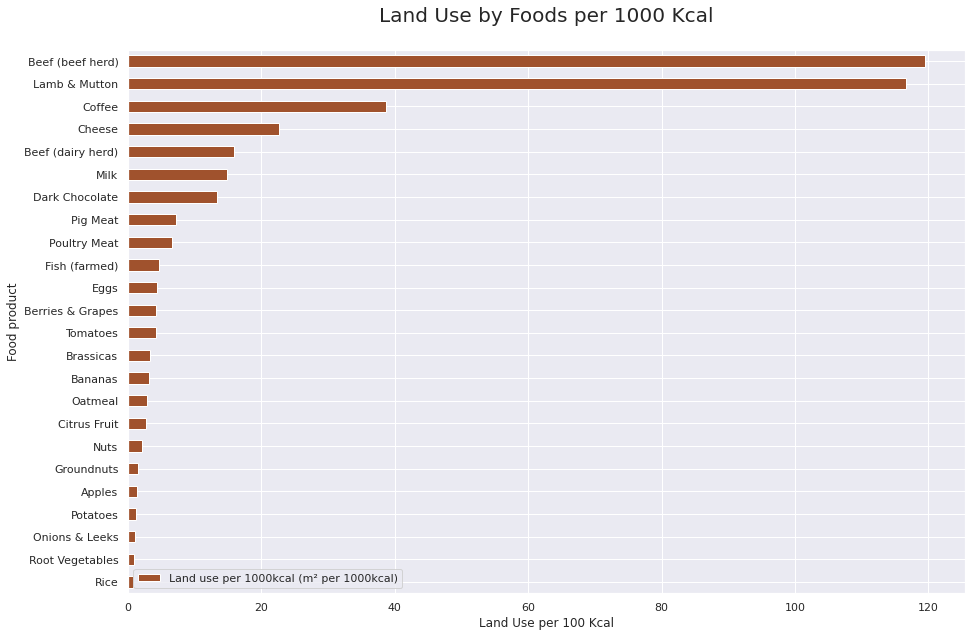

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.show()

Animal based foods consume most of the land.

In [17]:
land_df= df.dropna().sort_values(by= 'Land use per kilogram (m² per kilogram)', ascending= True)[['Food product',
       'Land use per kilogram (m² per kilogram)']]

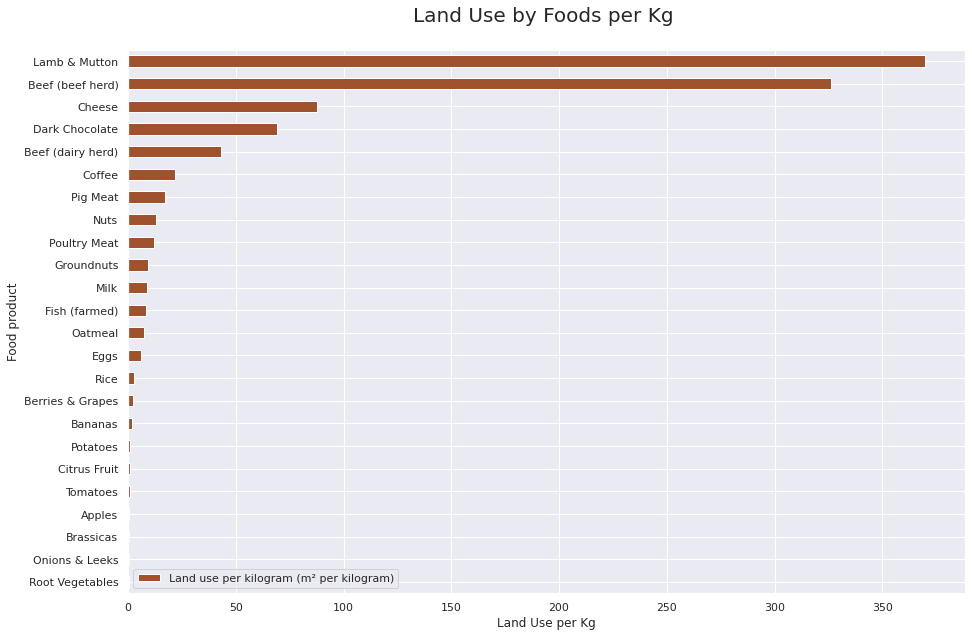

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per Kg")
plt.title("Land Use by Foods per Kg \n", size= 20)
plt.show()

We can observe that more land is used by lamb & Mutton to produce same amount of food than beef.¶

In [19]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', ascending= True)[['Food product',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)']]

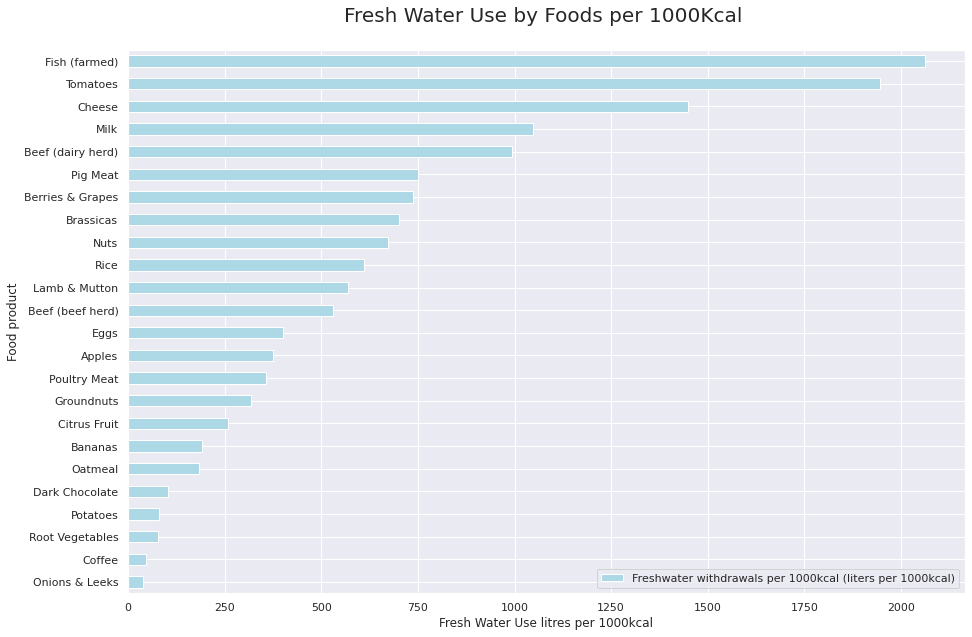

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 20)
plt.show()

Fresh water usage in litres per 1000 Kcal of food by Fish, Tomatoes and dairy products is highest.
Potatoes, root vegetables, coffee and Onions are some of the foods which require very less water to produce.

In [21]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Freshwater withdrawals per kilogram (liters per kilogram)']]


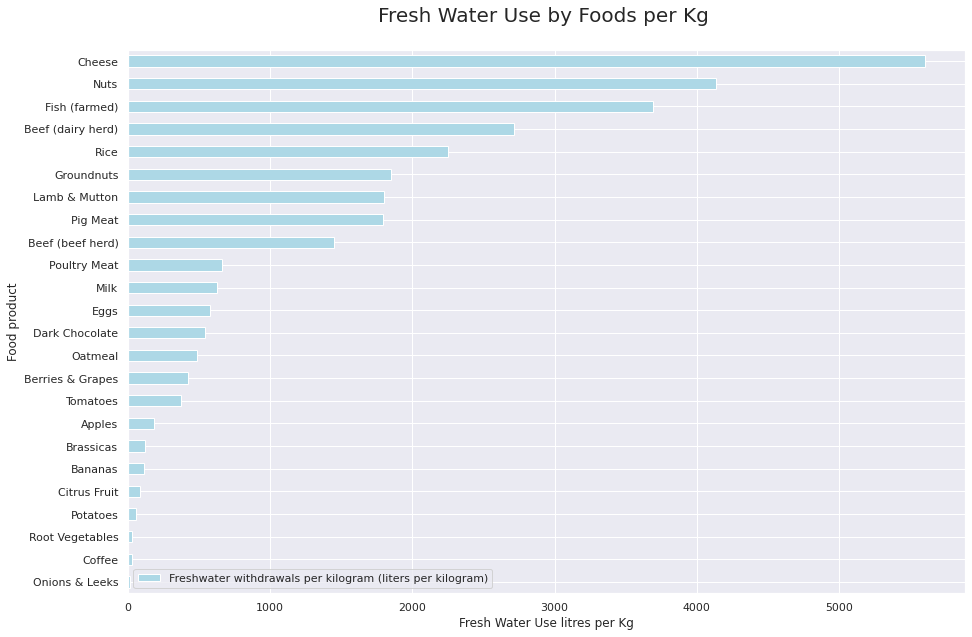

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.show()

Cheese and Nuts need more water to produce same amount(1 kg) of food than fish which takes more water if we compare them by amount of energy produced.

#### **Green house Gases**
A greenhouse gas is a gas that absorbs and emits radiant energy within the thermal infrared range. Greenhouse gases cause the greenhouse effect on planets. The primary greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone.

In [23]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]

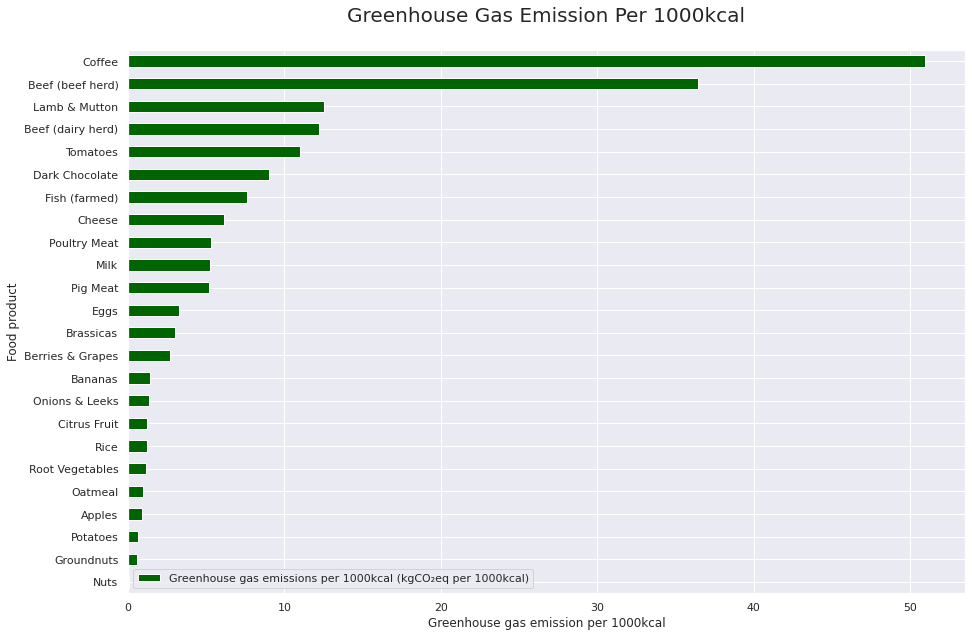

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 1000kcal")
plt.title("Greenhouse Gas Emission Per 1000kcal\n", size= 20)
plt.show()

Animal based foods produce around 50% more emissions than plant based foods like potatoes, apples, groundnuts.
Coffee has the most carbon footprint per 1000kcal followed by beef which is not surprising.

In [25]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

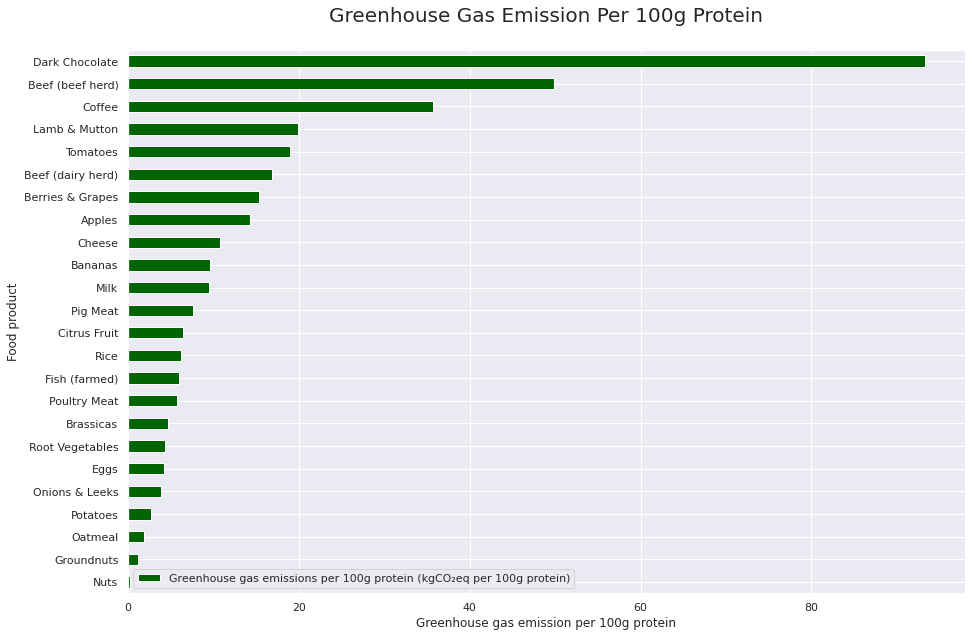

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.show()

Dark chocolate has most carbon footprint in terms of nutritional values(per 100g protein).

#### **Scarcity-Weighted Water Use** 
Freshwater scarcity varies across the world: some regions have abundant water resources which does not impact agricultural demands while others experience severe water stress. Scarcity-weighted water use represents freshwater use weighted by local water scarcity.

In [27]:
scarcity_df= df.dropna().sort_values(by= 'Scarcity-weighted water use per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Scarcity-weighted water use per kilogram (liters per kilogram)']]

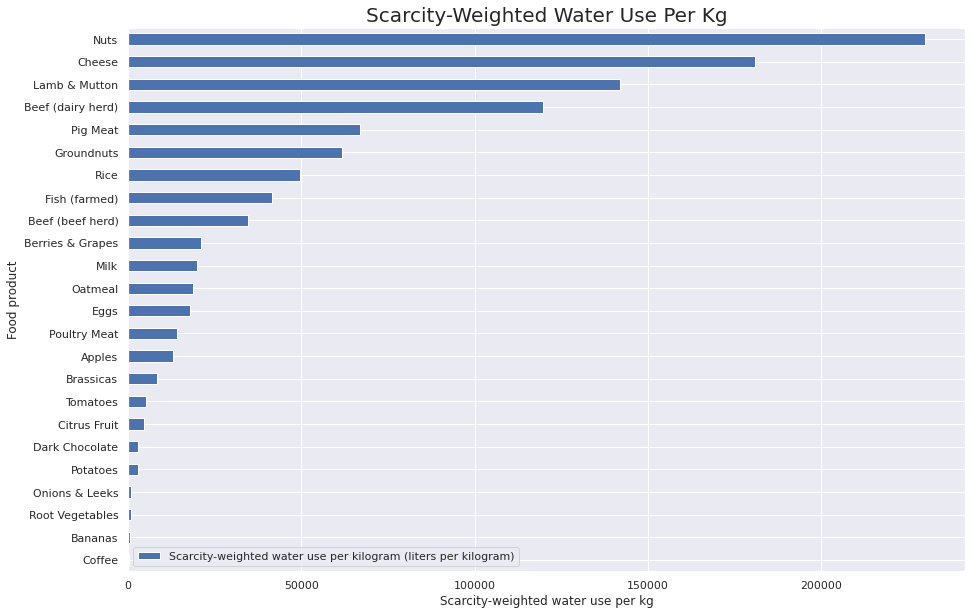

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per kg')
plt.title('Scarcity-Weighted Water Use Per Kg', size= 20)
plt.show()

To produce 1kg of food in water scarce areas, nuts and cheese use more water.

In [29]:
scarcity_df= df.dropna().sort_values(by= 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', ascending= True)[['Food product',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)']]


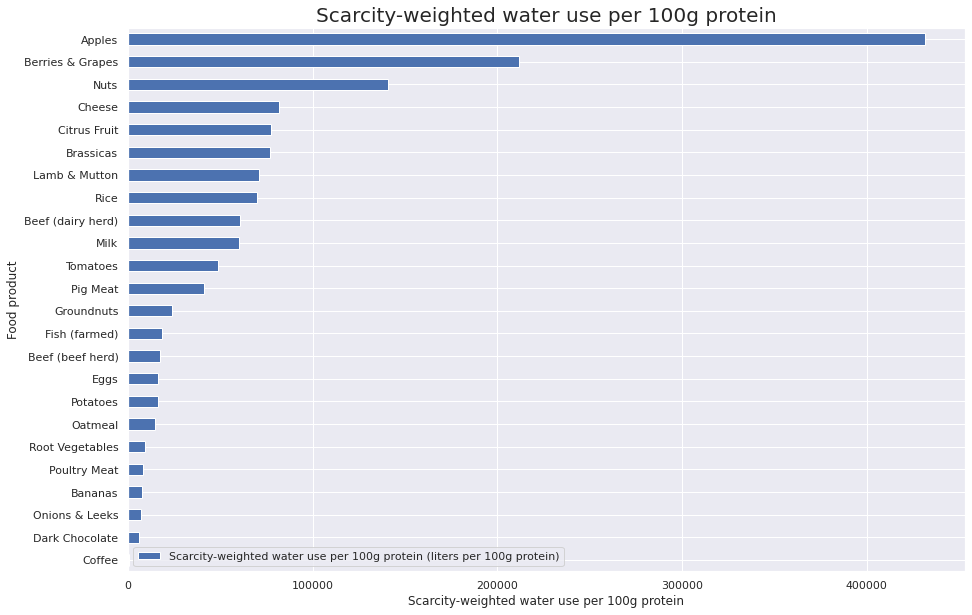

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per 100g protein')
plt.title('Scarcity-weighted water use per 100g protein', size= 20)
plt.show()

Apples and berries use more water in water scarce areas to produce same amount of nutritional content. It's an important insight to consider in areas where water is scarce.

#### **Eutrophication**
The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor to environmental pollution. Let's compare different foods in terms of eutrophication

In [31]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]

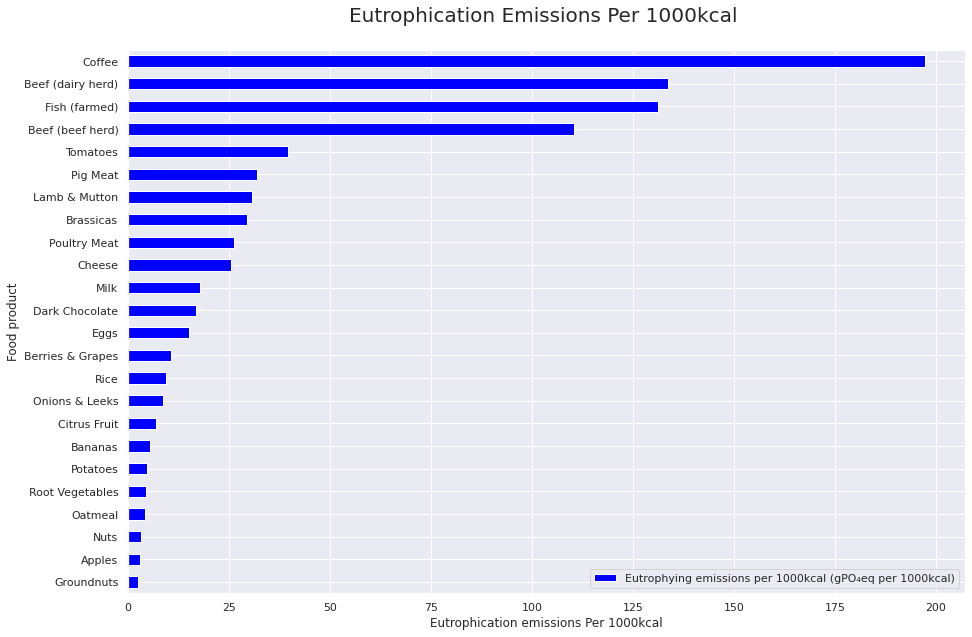

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "blue")
plt.xlabel('Eutrophication emissions Per 1000kcal')
plt.title('Eutrophication Emissions Per 1000kcal \n', size= 20)
plt.show()

Coffee does the most eutrophication emission when compared by energy per 1000kcal. Plant based foods are at the bottom.

In [34]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

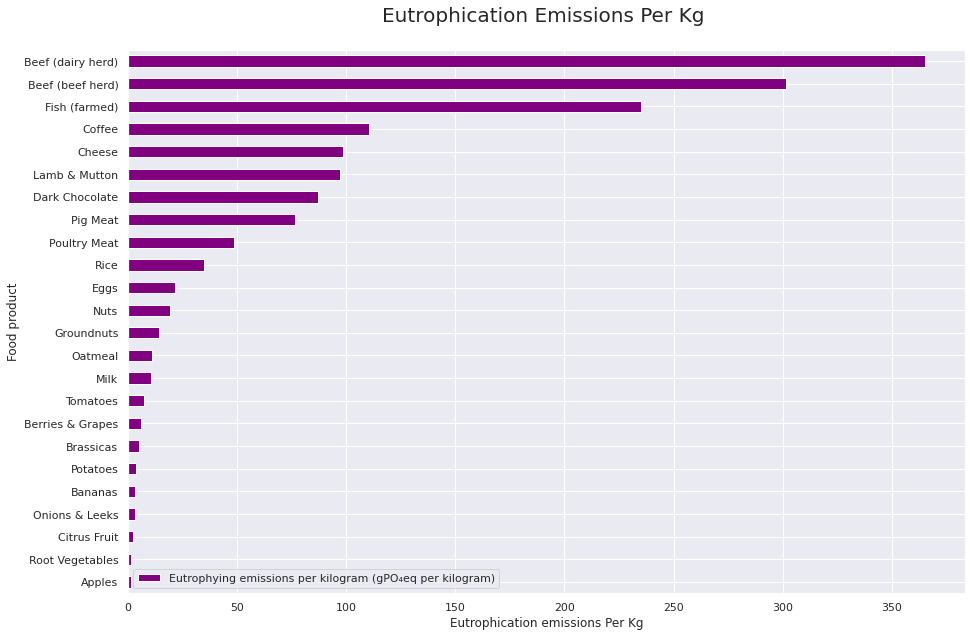

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "purple")
plt.xlabel('Eutrophication emissions Per Kg')
plt.title('Eutrophication Emissions Per Kg \n', size= 20)
plt.show()

Animal based foods are most responsible for eutrophication emission to produce 1kg while plant-based foods contibute very less.

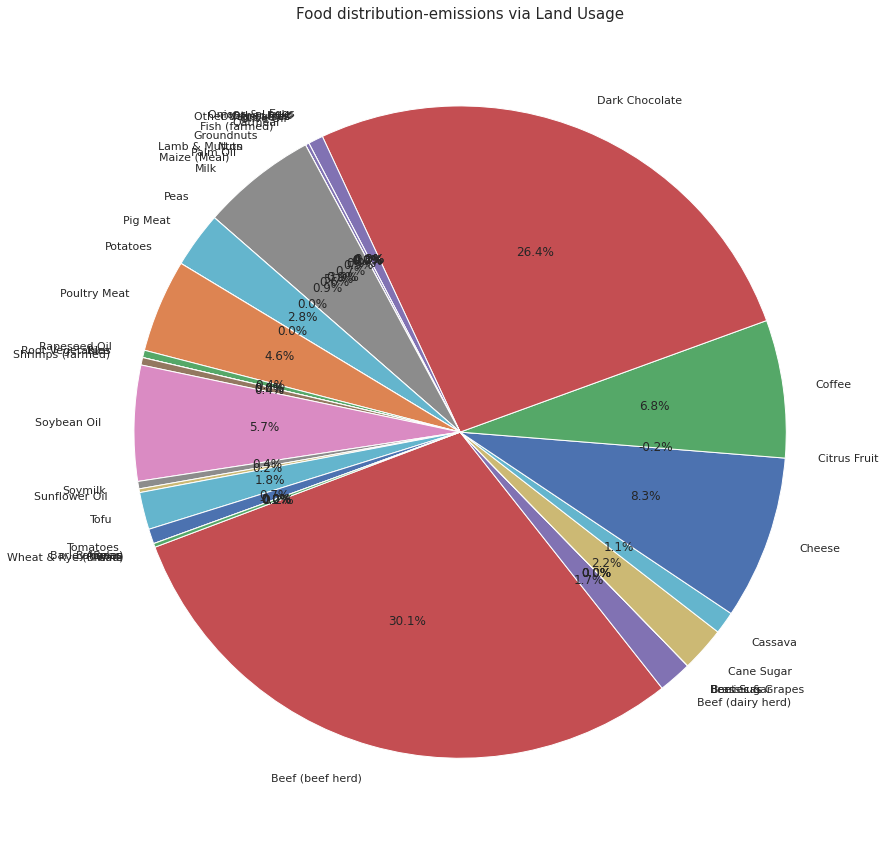

In [46]:
plt.figure(figsize=(15,15))
temp_series = df.groupby('Food product')['Land use change'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution-emissions via Land Usage", fontsize=15)
plt.show()

More than 50% of the emissions via land use are shared by beef and dark chocolate. It's a huge contribution in terms of land usage

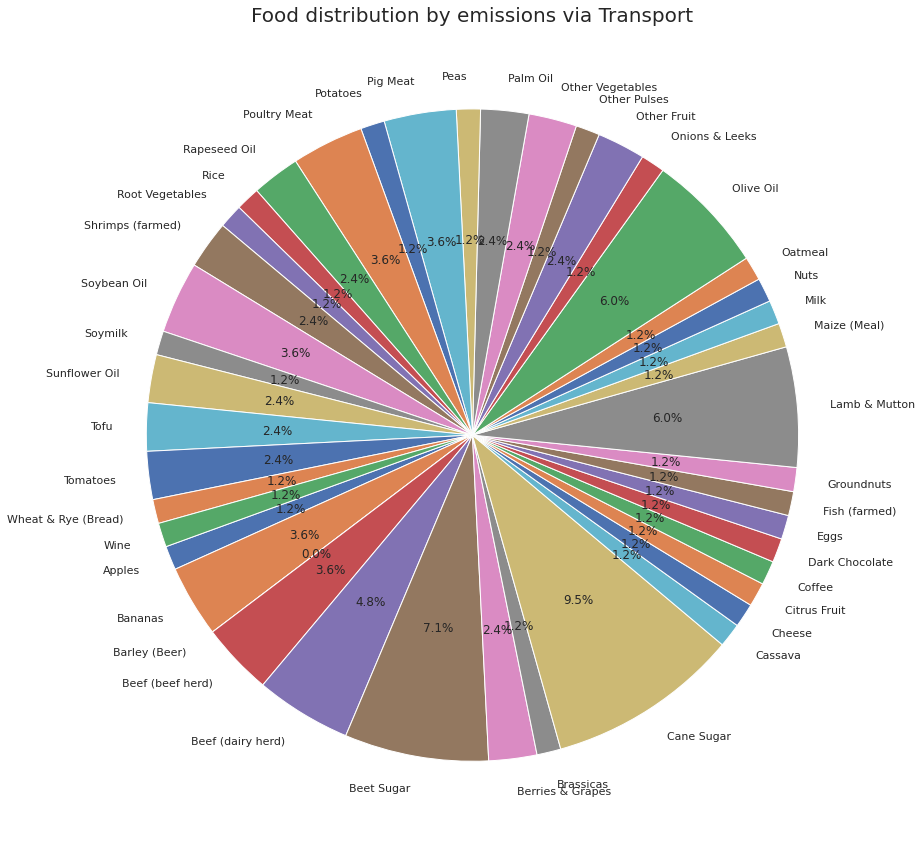

In [42]:
plt.figure(figsize=(15,15))
temp_series = df.groupby('Food product')['Transport'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution by emissions via Transport", fontsize=20)
plt.show()

Generally Emissions via transport are uniform across different foods with cane sugar having most share.

In [43]:
corrmat = df.corr(method='pearson')


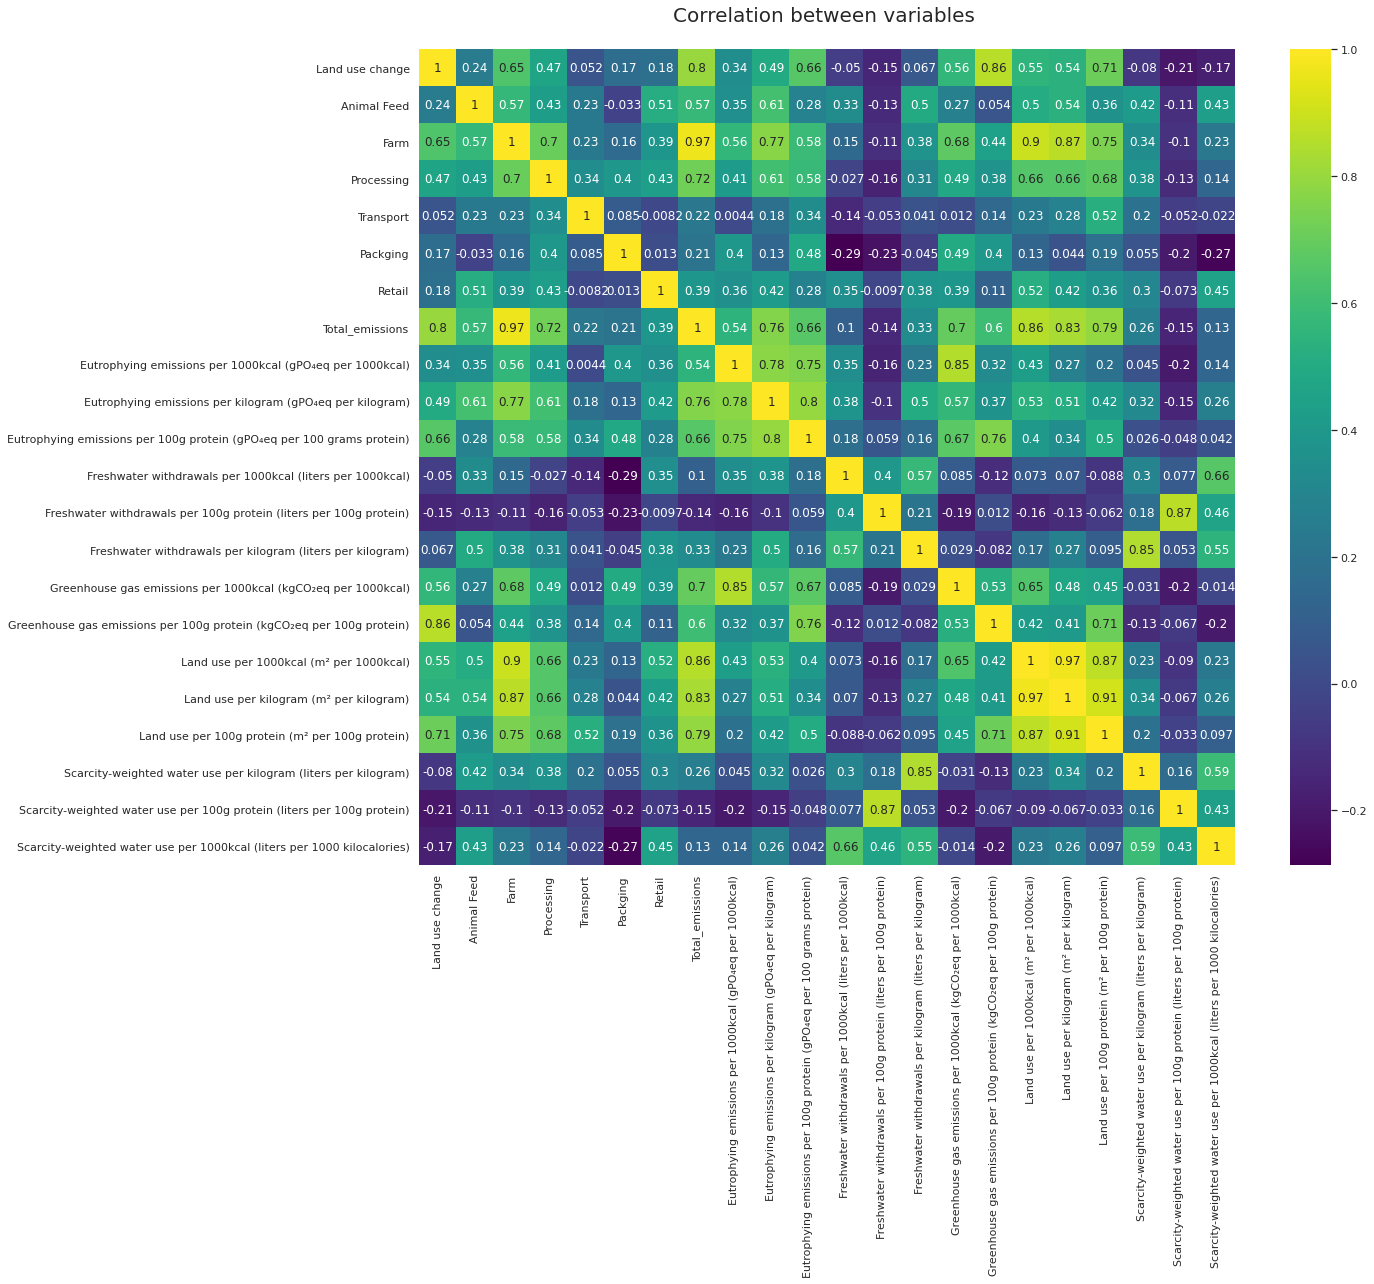

In [45]:
f, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corrmat, vmax=1., square=True, annot= True,cmap= "viridis")
plt.title("Correlation between variables \n", fontsize=20)
plt.show()

#### **Conclusion**
Animal based foods use more resources and have higher carbon footprint than plant based diets. Time to think about what you eat. Choose your food wisely and stay healthy